# LOAD LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import joblib

# DATA LOADING

In [3]:
df = pd.read_csv('salary_data.csv')

In [4]:
df.head()

,Job_Title,Industry,Education_Level,Years_of_Experience,Age,Gender,Marital_Status,Location,Hours_Per_Week,Work_Mode,Company_Size,Salary
0,Graphic Designer,Marketing,Master's,19.0,39.0,Male,Married,Chicago,72.0,On-site,Large,2261929
1,Project Manager,Consulting,High School,24.0,42.0,Male,Married,Dallas,62.0,Hybrid,Large,3219496
2,Data Analyst,IT,Bachelor's,3.0,23.0,Male,Single,Bangalore,46.0,Remote,Large,1626459
3,Plant Supervisor,Manufacturing,High School,12.0,34.0,Male,Single,Bangalore,66.0,Hybrid,Large,1896991
4,DevOps Engineer,IT,Bachelor's,11.0,32.0,Male,Widowed,Bangalore,61.0,Hybrid,Large,2397320


In [5]:
df.shape

(95000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job_Title            94033 non-null  object 
 1   Industry             93509 non-null  object 
 2   Education_Level      93841 non-null  object 
 3   Years_of_Experience  93471 non-null  float64
 4   Age                  93432 non-null  float64
 5   Gender               93837 non-null  object 
 6   Marital_Status       93165 non-null  object 
 7   Location             93139 non-null  object 
 8   Hours_Per_Week       93228 non-null  float64
 9   Work_Mode            93832 non-null  object 
 10  Company_Size         93453 non-null  object 
 11  Salary               95000 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 8.7+ MB


In [7]:
df.columns

Index(['Job_Title', 'Industry', 'Education_Level', 'Years_of_Experience',
       'Age', 'Gender', 'Marital_Status', 'Location', 'Hours_Per_Week',
       'Work_Mode', 'Company_Size', 'Salary'],
      dtype='object')

# DATA CLEANING & TRANFORMATION

In [8]:
df.isnull().sum()

Job_Title               967
Industry               1491
Education_Level        1159
Years_of_Experience    1529
Age                    1568
Gender                 1163
Marital_Status         1835
Location               1861
Hours_Per_Week         1772
Work_Mode              1168
Company_Size           1547
Salary                    0
dtype: int64

In [10]:
df['Job_Title'].unique()

array(['Graphic Designer', 'Project Manager', 'Data Analyst',
       'Plant Supervisor', 'DevOps Engineer', 'Medical Assistant',
       'Business Analyst', 'Sales Associate', 'Financial Analyst',
       'Digital Marketer', 'Marketing Manager', 'Legal Advisor',
       'Quality Analyst', 'Teacher', 'Accountant', 'Data Scientist',
       'Paralegal', 'Nurse', 'Professor', 'SEO Specialist', 'Doctor',
       'Software Engineer', nan], dtype=object)

In [11]:
df = df[~((df['Job_Title'].isnull()) & (df['Industry'].isnull()) & (df['Education_Level'].isnull()) & (df['Years_of_Experience'].isnull()) & 
   (df['Age'].isnull()) & (df['Gender'].isnull()) & (df['Marital_Status'].isnull()) & (df['Location'].isnull()) & (df['Hours_Per_Week'].isnull()) &
   (df['Work_Mode'].isnull()) & (df['Company_Size'].isnull()))]

In [12]:
df.shape

(94033, 12)

In [13]:
df.isnull().sum()

Job_Title                0
Industry               524
Education_Level        192
Years_of_Experience    562
Age                    601
Gender                 196
Marital_Status         868
Location               894
Hours_Per_Week         805
Work_Mode              201
Company_Size           580
Salary                   0
dtype: int64

In [15]:
df.groupby('Industry')['Job_Title'].unique()

Industry
Consulting                     [Project Manager, Business Analyst]
Education                                     [Teacher, Professor]
Finance          [Financial Analyst, Accountant, Business Analyst]
Healthcare                      [Medical Assistant, Nurse, Doctor]
IT               [Data Analyst, DevOps Engineer, Data Scientist...
Legal                                   [Legal Advisor, Paralegal]
Manufacturing                  [Plant Supervisor, Quality Analyst]
Marketing        [Graphic Designer, Digital Marketer, Marketing...
Retail                        [Sales Associate, Marketing Manager]
Name: Job_Title, dtype: object

In [16]:
job_counts = df.groupby('Industry')['Job_Title'].value_counts()
job_counts

Industry       Job_Title        
Consulting     Project Manager      5266
               Business Analyst     5230
Education      Teacher              5128
               Professor            5045
Finance        Business Analyst     3502
               Financial Analyst    3489
               Accountant           3400
Healthcare     Doctor               3458
               Nurse                3398
               Medical Assistant    3385
IT             Project Manager      1796
               Data Scientist       1760
               DevOps Engineer      1751
               Business Analyst     1730
               Software Engineer    1706
               Data Analyst         1698
Legal          Paralegal            5239
               Legal Advisor        5169
Manufacturing  Plant Supervisor     5238
               Quality Analyst      5178
Marketing      Digital Marketer     2637
               Marketing Manager    2633
               SEO Specialist       2604
               Graphic D

In [17]:
df['original_order'] = np.arange(len(df))

In [18]:
def fill_job_title(group):
    mode = group['Job_Title'].mode()
    if not mode.empty:
        group['Job_Title'] = group['Job_Title'].fillna(mode[0])
    return group

df = df.groupby('Industry').apply(fill_job_title)

C:\Users\mayan\AppData\Local\Temp\ipykernel_3916\849499413.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Industry').apply(fill_job_title)


In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df = df.sort_values('original_order').reset_index(drop=True)

df.drop('original_order',axis=1,inplace=True)

In [21]:
df.groupby('Industry')['Job_Title'].value_counts()

Industry       Job_Title        
Consulting     Project Manager      5266
               Business Analyst     5230
Education      Teacher              5128
               Professor            5045
Finance        Business Analyst     3502
               Financial Analyst    3489
               Accountant           3400
Healthcare     Doctor               3458
               Nurse                3398
               Medical Assistant    3385
IT             Project Manager      1796
               Data Scientist       1760
               DevOps Engineer      1751
               Business Analyst     1730
               Software Engineer    1706
               Data Analyst         1698
Legal          Paralegal            5239
               Legal Advisor        5169
Manufacturing  Plant Supervisor     5238
               Quality Analyst      5178
Marketing      Digital Marketer     2637
               Marketing Manager    2633
               SEO Specialist       2604
               Graphic D

In [23]:
df.isnull().sum()

Job_Title                0
Industry                 0
Education_Level          0
Years_of_Experience     38
Age                     77
Gender                   0
Marital_Status         344
Location               370
Hours_Per_Week         281
Work_Mode                0
Company_Size            56
Salary                   0
dtype: int64

In [24]:
numeric_cols = ['Years_of_Experience','Age','Hours_Per_Week']

for col in numeric_cols:
    median_value = int(df[col].median())
    df[col] = df[col].fillna(median_value)

In [25]:
df.isnull().sum()

Job_Title                0
Industry                 0
Education_Level          0
Years_of_Experience      0
Age                      0
Gender                   0
Marital_Status         344
Location               370
Hours_Per_Week           0
Work_Mode                0
Company_Size            56
Salary                   0
dtype: int64

In [26]:
def fill_categorical_by_group(df,group_col,target_col):
    df[target_col] = df.groupby(group_col)[target_col].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
    return df

categorical_columns = ['Education_Level','Gender','Marital_Status','Location','Work_Mode','Company_Size']

for col in categorical_columns:
    df = fill_categorical_by_group(df, group_col='Industry', target_col=col)

In [28]:
df.isnull().sum()

Job_Title              0
Industry               0
Education_Level        0
Years_of_Experience    0
Age                    0
Gender                 0
Marital_Status         0
Location               0
Hours_Per_Week         0
Work_Mode              0
Company_Size           0
Salary                 0
dtype: int64

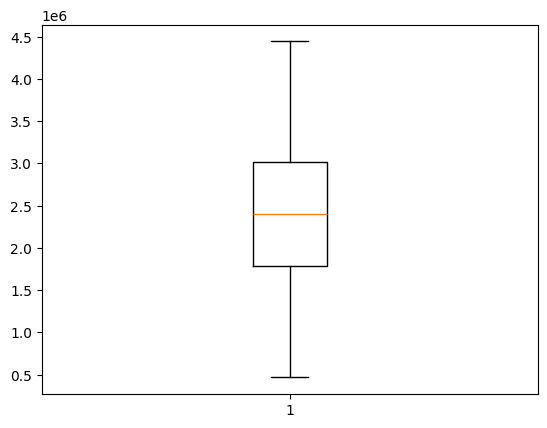

In [29]:
plt.boxplot(df['Salary'])
plt.show()

# CORRELATION

In [30]:
numeric = ['Years_of_Experience','Age','Hours_Per_Week','Salary']

df[numeric].corr()['Salary']

Years_of_Experience    0.914207
Age                    0.900656
Hours_Per_Week        -0.001619
Salary                 1.000000
Name: Salary, dtype: float64

In [31]:
categorical_columns = ['Job_Title','Industry','Education_Level','Gender','Marital_Status','Location','Work_Mode','Company_Size']

for col in categorical_columns:
    groups = [group['Salary'].values for name,group in df.groupby(col)]
    f_stat,p_val = stats.f_oneway(*groups)
    print(f"{col}: F = {f_stat:.2f}, p = {p_val:.5f}")

Job_Title: F = 663.59, p = 0.00000
Industry: F = 1178.86, p = 0.00000
Education_Level: F = 30.31, p = 0.00000
Gender: F = 0.46, p = 0.63372
Marital_Status: F = 1.08, p = 0.35628
Location: F = 93.53, p = 0.00000
Work_Mode: F = 0.12, p = 0.88638
Company_Size: F = 775.88, p = 0.00000


# MODEL BUILDING

In [32]:
categorical_cols = ['Job_Title', 'Industry', 'Education_Level', 'Gender', 'Marital_Status',
                    'Location', 'Work_Mode', 'Company_Size']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
df.head()

,Job_Title,Industry,Education_Level,Years_of_Experience,Age,Gender,Marital_Status,Location,Hours_Per_Week,Work_Mode,Company_Size,Salary
0,8,7,2,19.0,39.0,1,1,3,72.0,1,0,2261929
1,16,0,1,24.0,42.0,1,1,4,62.0,0,0,3219496
2,2,4,0,3.0,23.0,1,2,2,46.0,2,0,1626459
3,14,6,1,12.0,34.0,1,2,2,66.0,0,0,1896991
4,4,4,0,11.0,32.0,1,3,2,61.0,0,0,2397320


In [34]:
numerical_cols = ['Years_of_Experience', 'Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [35]:
df.head()

,Job_Title,Industry,Education_Level,Years_of_Experience,Age,Gender,Marital_Status,Location,Hours_Per_Week,Work_Mode,Company_Size,Salary
0,8,7,2,-0.080827,-0.163759,1,1,3,72.0,1,0,2261929
1,16,0,1,0.342261,0.086647,1,1,4,62.0,0,0,3219496
2,2,4,0,-1.434707,-1.499257,1,2,2,46.0,2,0,1626459
3,14,6,1,-0.673149,-0.581102,1,2,2,66.0,0,0,1896991
4,4,4,0,-0.757767,-0.748039,1,3,2,61.0,0,0,2397320


In [36]:
x = df[['Job_Title','Industry','Education_Level','Years_of_Experience','Age','Location','Company_Size']]
y = df['Salary']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
models = {
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=15,weights='uniform'),
    "Decision Tree": DecisionTreeRegressor(max_depth=10,min_samples_leaf=20,min_samples_split=20),
    "Random Forest": RandomForestRegressor(n_estimators=10,max_depth=8,min_samples_leaf=30,min_samples_split=30),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=3,learning_rate = 1,max_depth=5,min_samples_leaf=40,min_samples_split=40)
}

In [40]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "Model": model,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

In [41]:
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name} Regressor:")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")


Model Evaluation Results:

K-Nearest Neighbors Regressor:
MAE: 94435.34
MSE: 14249095663.97
RMSE: 119369.58
R2 Score: 0.9762

Decision Tree Regressor:
MAE: 104144.54
MSE: 17566049941.53
RMSE: 132536.98
R2 Score: 0.9706

Random Forest Regressor:
MAE: 121619.37
MSE: 24758883011.33
RMSE: 157349.56
R2 Score: 0.9586

Gradient Boosting Regressor:
MAE: 109034.43
MSE: 19190393310.91
RMSE: 138529.40
R2 Score: 0.9679


In [42]:
best_model_name = max(results, key=lambda x: results[x]["R2 Score"])
best_model = results[best_model_name]["Model"]
joblib.dump(best_model, 'salary_model.pkl')
print(f"\n✅ Best model '{best_model_name}' saved as 'salary_model.pkl'")


✅ Best model 'K-Nearest Neighbors' saved as 'salary_model.pkl'


In [43]:
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")

✅ Scaler saved as 'scaler.pkl'


In [44]:
feature_columns = list(x.columns)
joblib.dump(feature_columns, 'feature_columns.pkl')
print("✅ Feature columns saved as 'feature_columns.pkl'")

✅ Feature columns saved as 'feature_columns.pkl'


In [45]:
joblib.dump(label_encoders, 'label_encoders.pkl')
print("✅ Label encoders saved as 'label_encoders.pkl'")

✅ Label encoders saved as 'label_encoders.pkl'


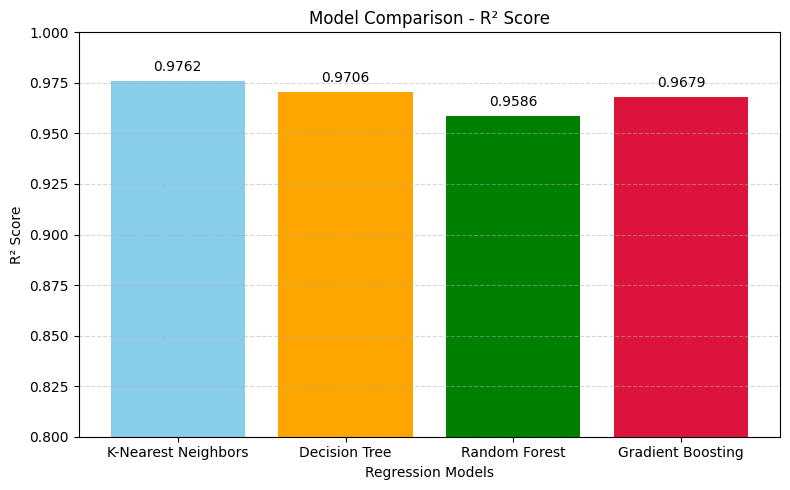

In [ ]:
model_names = list(results.keys())
r2_scores = [metrics['R2 Score'] for metrics in results.values()]
# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores, color=['skyblue', 'orange', 'green', 'crimson'])
# Annotate bars with R² values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)
plt.title('Model Comparison - R² Score')
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.ylim(0.80, 1.0)
plt.show()